# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_xarr
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_tas_xarr
from Fonctions import get_3D_pr_xarr

# Read files : tas

## The ensemble mean

In [3]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/ENSEMBLE2/'
filename='*_amip_*.nc'
variables=['pr']

# List, à changer en fonction de ce que l'on veut regarder :
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']


N=len(nb_p_list)
amip={}
i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    path=path_PPE+'CNRM-CM6-1_amip_LHS500_PPE/CNRM-CM6-1_amip_r1i1'+str(nb_p)+'f2/'
    amip[str(nb_p)] = get_3D_pr_xarr(path, filename, variables)
    i=i+1   

p311
p312
p314
p316
p317
p319
p320
p321
p322
p324
p325
p326
p329
p330
p331
p332
p335
p336
p337
p338
p340
p341
p343
p344
p346
p347
p348
p349
p350
p353
p355
p357
p359
p360
p361
p363
p365
p367
p368
p369
p372
p373
p374
p375
p376
p378
p381
p382
p384
p386
p388
p389
p391
p392
p393
p394
p395
p396
p398
p399
p400
p404
p406
p407
p409
p410
p411
p412
p414
p416
p413
p419
p424
p426
p428
p421
p423
p425
p427
p429
p430
p436
p438
p431
p433
p442
p446
p443
p445
p447
p452
p454
p456
p458
p457
p459
p460
p465
p467
p469
p470
p471


In [4]:
n=len(nb_p_list)
amip_list=[0]*(n)



i = 0
while i<n:
    nb_p = nb_p_list[i]
    tmp = amip[str(nb_p)]
    amip_list[i] = tmp
    i+=1

In [5]:
matrix = xr.combine_nested(amip_list, concat_dim=['members'])
matrix

<xarray.DataArray 'pr' (members: 102, lat: 128, lon: 256)>
dask.array<concatenate, shape=(102, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: members
Attributes:
    long_name:           Precipitation
    units:               kg m-2 s-1
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       precipitation_flux
    description:         at surface; includes both liquid and solid phases fr...
    history:             none
    cell_measures:       area: areacella

In [6]:
ens_mean_PPE = matrix.mean(dim='members')
ens_mean_PPE

<xarray.DataArray 'pr' (lat: 128, lon: 256)>
dask.array<mean_agg-aggregate, shape=(128, 256), dtype=float32, chunksize=(128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93

In [25]:
std_PPE = matrix.std(dim='members')*86400
std_PPE

<xarray.DataArray 'pr' (lat: 128, lon: 256)>
dask.array<mul, shape=(128, 256), dtype=float64, chunksize=(128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93

## Get the CMIP6 datatset

In [8]:
def load_monthly_clim(path, filename, variables) :
    
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    df=file[variables].to_dataframe()
    
    # Compute Climatological Annual Cycle :
    df1=df.reset_index(level=['time', 'lat', 'lon'])
    df1['month']=pd.DatetimeIndex(df1['time']).month # time in years
    df_mean=df1.groupby(['month', 'lat', 'lon']).mean()
    
    return df_mean

In [10]:
# Download the amip dataframes and compute the radiative budget  

path = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/"
filename = "*_amip_*.nc"
variables = ['pr']
CNRM_df = load_monthly_clim(path, filename, variables)
#CNRM_tmp = CNRM_df.drop('height', axis=1)
CRM_amip = CNRM_df.groupby(['lat','lon']).mean().to_xarray()


path = "/data/scratch/globc/peatier/CMIP6/MRI-ESM2-0/amip/"
filename = "*_amip_*_regrid.nc"
MRI_df = load_monthly_clim(path, filename, variables)
#MRI_tmp = MRI_df.drop('height', axis=1)
MRI_amip = MRI_df.groupby(['lat','lon']).mean().to_xarray()

path = "/data/scratch/globc/peatier/CMIP6/CanESM5/amip/"
filename = "standard_*_amip_*regrid.nc"
CAN_df = load_monthly_clim(path, filename, variables)
#CAN_tmp = CAN_df.drop('height', axis=1)
CAN_amip = CAN_df.groupby(['lat','lon']).mean().to_xarray()

path = "/data/scratch/globc/peatier/CMIP6/MIROC6/"
filename = "*_amip_*regrid.nc"
MIROC_df = load_monthly_clim(path, filename, variables)
#MIROC_tmp = MIROC_df.drop('height', axis=1)
MIROC_amip = MIROC_df.groupby(['lat','lon']).mean().to_xarray()

path = "/data/scratch/globc/peatier/CMIP6/HadGEM3-GC31-LL/"
filename = "standard_*_amip_*regrid.nc"
HadGEM3_df = load_monthly_clim(path, filename, variables)
#HadGEM3_tmp = HadGEM3_df.drop('height', axis=1)
HadGEM3_amip = HadGEM3_df.groupby(['lat','lon']).mean().to_xarray()

path = "/data/scratch/globc/peatier/CMIP6/IPSL-CM6A-LR/"
filename = "*_amip_*regrid.nc"
IPSL_df = load_monthly_clim(path, filename, variables)
#IPSL_tmp = IPSL_df.drop('height', axis=1)
IPSL_amip = IPSL_df.groupby(['lat','lon']).mean().to_xarray()

path = "/data/scratch/globc/peatier/CMIP6/BCC-CSM2-MR/"
filename = "standard_*_amip_*regrid.nc"
BCC_df = load_monthly_clim(path, filename, variables)
#BCC_tmp = BCC_df.drop('height', axis=1)
BCC_amip = BCC_df.groupby(['lat','lon']).mean().to_xarray()

In [17]:
CMIP6 = [0]*7
CNRM_amip = CRM_amip
CMIP6[0] = CNRM_amip
CMIP6[1] = MRI_amip
CMIP6[2] = CAN_amip
CMIP6[3] = MIROC_amip
CMIP6[4] = HadGEM3_amip
CMIP6[5] = IPSL_amip
CMIP6[6] = BCC_amip

In [18]:
CMIP6

[<xarray.Dataset>
 Dimensions:  (lat: 128, lon: 256)
 Coordinates:
   * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
   * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
 Data variables:
     pr       (lat, lon) float32 2.3055347e-06 2.3055347e-06 ... 7.564115e-06
     height   (lat, lon) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0,
 <xarray.Dataset>
 Dimensions:  (lat: 128, lon: 256)
 Coordinates:
   * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
   * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
 Data variables:
     pr       (lat, lon) float32 1.7673447e-06 1.7593288e-06 ... 8.224595e-06
     height   (lat, lon) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0,
 <xarray.Dataset>
 Dimensions:  (lat: 128, lon: 256)
 Coordinates:
   * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
   * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 3

In [19]:
matrix_CMIP6 = xr.combine_nested(CMIP6, concat_dim=['members'])
matrix_CMIP6

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256, members: 7)
Coordinates:
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: members
Data variables:
    pr       (members, lat, lon) float32 2.3055347e-06 ... 7.754546e-06
    height   (members, lat, lon) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0

In [20]:
ens_mean_CMIP6 = matrix_CMIP6.mean(dim='members')
ens_mean_CMIP6

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256)
Coordinates:
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Data variables:
    pr       (lat, lon) float32 1.8540568e-06 1.8449495e-06 ... 7.3725723e-06
    height   (lat, lon) float64 1.929 1.929 1.929 1.929 ... 1.929 1.929 1.929

In [24]:
std_CMIP6 = matrix_CMIP6.std(dim='members')*86400
std_CMIP6

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256)
Coordinates:
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Data variables:
    pr       (lat, lon) float64 0.0305 0.03047 0.03071 ... 0.06816 0.06825
    height   (lat, lon) float64 1.512e+04 1.512e+04 ... 1.512e+04 1.512e+04

## Get the GPCP datatset

In [11]:
def load_monthly_clim(path, filename, variables) :
    
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    df=file[variables].to_dataframe()
    
    # Compute Climatological Annual Cycle :
    df1=df.reset_index(level=['time', 'lat', 'lon'])
    df1['month']=pd.DatetimeIndex(df1['time']).month # time in years
    df_mean=df1.groupby(['month', 'lat', 'lon']).mean()
    
    return df_mean

In [12]:
path_observation = '/data/home/globc/peatier/obs_data/GPCP/'
filename = 'pr_mon_mean_197901-201912_regrid.nc'
    
# Load data and compute Annual Cycle :
variables = ['pr']
df_obs = load_monthly_clim(path_observation, filename, variables)
#df_obs['pr'] = df_obs['pr']
df_obs

pr
month lat        lon                
1     -88.927735 0.00000    0.023976
                 1.40625    0.026398
                 2.81250    0.026663
                 4.21875    0.028602
                 5.62500    0.028689
...                              ...
12     88.927735 352.96875  0.397433
                 354.37500  0.384588
                 355.78125  0.384481
                 357.18750  0.382383
                 358.59375  0.382303

[393216 rows x 1 columns]

In [13]:
obs = df_obs.groupby(['lat','lon']).mean().to_xarray()
obs

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Data variables:
    pr       (lat, lon) float32 0.3159773 0.3089214 ... 0.50588834 0.50602216

# Estimate bases [model - obs]

In [22]:
PPE_diff = ens_mean_PPE*86400 - obs
CMIP6_diff = ens_mean_CMIP6*86400 - obs

In [26]:
PPE_diff

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height   float64 2.0
Data variables:
    pr       (lat, lon) float64 dask.array<chunksize=(128, 256), meta=np.ndarray>

In [27]:
def map_plot(data, title, label_min, label_max, name_figure, labelbar, cmap):
    # Plot the EOF map 

    lat = data['lat'][:]
    lon = data['lon'][:]
    
    fig = plt.figure(figsize=(10, 10))
    ax=plt.gca()

    ax.set_title(title, fontsize=18)

    m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
    x, y = m(*np.meshgrid(lon,lat))


    m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
    #m.colorbar()
    cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
    cbar.set_label(labelbar, size = 16, style = 'italic')

    m.drawcoastlines()
    m.drawmapboundary()
    plt.clim(label_min, label_max)

    # Enregistrer la figure .....................

    plt.savefig("/data/home/globc/peatier/figures/"+name_figure, 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

    # Show la figure .................
    plt.show()

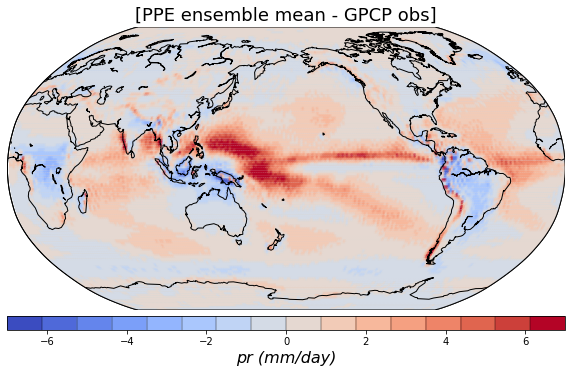

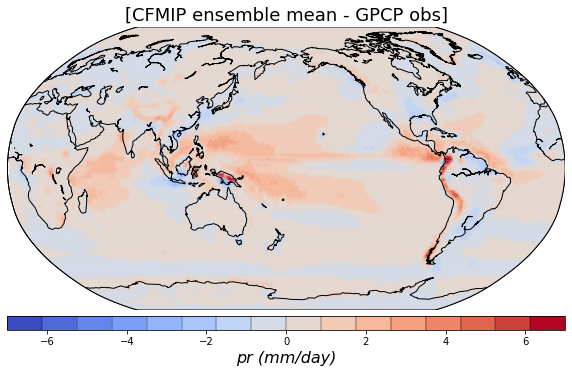

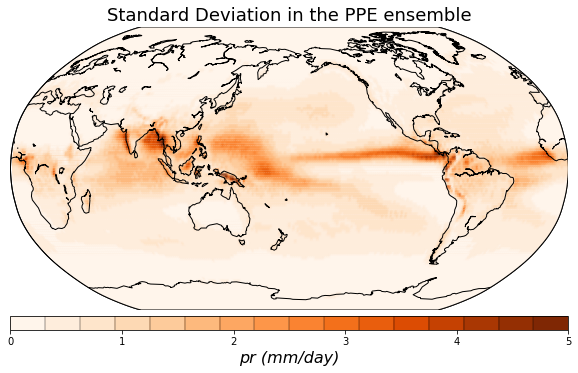

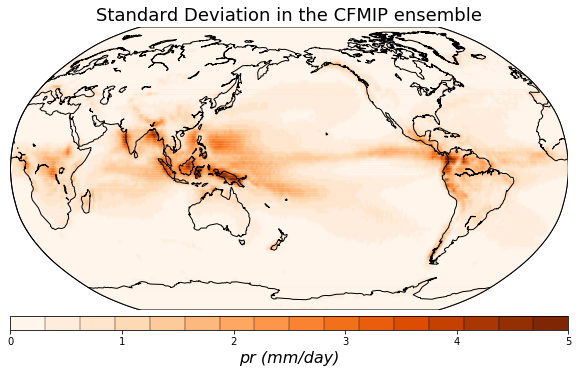

In [29]:
data = PPE_diff['pr']
title = "[PPE ensemble mean - GPCP obs]"
label_min = -7
label_max = 7
name_figure = "pr_diff_PPE_GPCP.png"
labelbar = 'pr (mm/day)'
cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want
map_plot(data, title, label_min, label_max, name_figure, labelbar, cmap)


data = CMIP6_diff['pr']
title = "[CFMIP ensemble mean - GPCP obs]"
label_min = -7
label_max = 7
name_figure = "pr_diff_CFMIP_BEST.png"
labelbar='pr (mm/day)'
cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want
map_plot(data, title, label_min, label_max, name_figure, labelbar, cmap)


data = std_PPE
title = "Standard Deviation in the PPE ensemble"
label_min = 0
label_max = 5
name_figure = "pr_std_PPE_3D.png"
labelbar = 'pr (mm/day)'
cmap = plt.get_cmap('Oranges',16)  # define the colormap, take the number of discrete colors you want
map_plot(data, title, label_min, label_max, name_figure, labelbar, cmap)


data = std_CMIP6['pr']
title = "Standard Deviation in the CFMIP ensemble"
label_min = 0
label_max = 5
name_figure = "pr_std_CFMIP_3D.png"
labelbar = 'pr (mm/day)'
cmap = plt.get_cmap('Oranges',16)  # define the colormap, take the number of discrete colors you want
map_plot(data, title, label_min, label_max, name_figure, labelbar, cmap)